In [1]:
#https://www.esrl.noaa.gov/psd/enso/mei/
#https://www.esrl.noaa.gov/psd/enso/mei.ext/table.ext.html



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests

In [2]:
columnStr = ['global', 'N_Hemis', 'S_Hemis']

df = pd.read_csv('/home/poyraden/MLR_Uccle/Codes/Files/teleconnection_indices/AOD.txt',
                   sep = "\s *", engine="python", skiprows=1, names=columnStr)
df[:1850.125]

,global,N_Hemis,S_Hemis
1850.125,0.0042,0.0042,0.0042


In [3]:
year_dif = (pd.Timestamp('2012-12-01') - pd.Timestamp('1850-01-01'))/np.timedelta64(1,'Y')
print(year_dif)
tot = int(year_dif)+1
year = [0]*tot
for i in range(1850, 2013):
    year[i-1850] = i
print(len(year),year)

162.91641854384415
163 [1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012

In [4]:

date = [[0] * 12] * tot
index = [[''] * 12] * tot

In [5]:
indv = []
datev = []

for y in range(tot):
    for m in range(12):
        index[y][m] = str(year[y])+'-'+str(m+1)+'-01'
        indv.append(index[y][m])
indv = indv[0:1952]

#print(len(datev),datev)
print(len(indv), indv)

1952 ['1850-1-01', '1850-2-01', '1850-3-01', '1850-4-01', '1850-5-01', '1850-6-01', '1850-7-01', '1850-8-01', '1850-9-01', '1850-10-01', '1850-11-01', '1850-12-01', '1851-1-01', '1851-2-01', '1851-3-01', '1851-4-01', '1851-5-01', '1851-6-01', '1851-7-01', '1851-8-01', '1851-9-01', '1851-10-01', '1851-11-01', '1851-12-01', '1852-1-01', '1852-2-01', '1852-3-01', '1852-4-01', '1852-5-01', '1852-6-01', '1852-7-01', '1852-8-01', '1852-9-01', '1852-10-01', '1852-11-01', '1852-12-01', '1853-1-01', '1853-2-01', '1853-3-01', '1853-4-01', '1853-5-01', '1853-6-01', '1853-7-01', '1853-8-01', '1853-9-01', '1853-10-01', '1853-11-01', '1853-12-01', '1854-1-01', '1854-2-01', '1854-3-01', '1854-4-01', '1854-5-01', '1854-6-01', '1854-7-01', '1854-8-01', '1854-9-01', '1854-10-01', '1854-11-01', '1854-12-01', '1855-1-01', '1855-2-01', '1855-3-01', '1855-4-01', '1855-5-01', '1855-6-01', '1855-7-01', '1855-8-01', '1855-9-01', '1855-10-01', '1855-11-01', '1855-12-01', '1856-1-01', '1856-2-01', '1856-3-01', '

In [6]:
print(len(df))
df['indv'] = indv
df['indv'] = pd.to_datetime(df['indv'], format='%Y-%m')

df.set_index('indv', inplace=True)
df[0:10]

1952


,global,N_Hemis,S_Hemis
indv,,,
1850-01-01,0.0042,0.0042,0.0042
1850-02-01,0.0040,0.0040,0.0040
1850-03-01,0.0039,0.0039,0.0039
1850-04-01,0.0037,0.0037,0.0037
1850-05-01,0.0036,0.0036,0.0036
1850-06-01,0.0034,0.0034,0.0034
1850-07-01,0.0034,0.0034,0.0034
1850-08-01,0.0033,0.0033,0.0033
1850-09-01,0.0032,0.0032,0.0032


In [7]:
df_ds.to_csv('/home/poyraden/MLR_Uccle/Files/enso_deseas.csv')

NameError: name 'df_ds' is not defined

['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']


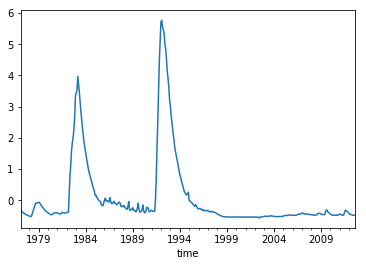

In [8]:
predictors = load_data('pred_baseline_ilt.csv')
print(list(predictors))
predictors.aod.loc[:'2012-09-01'].plot()

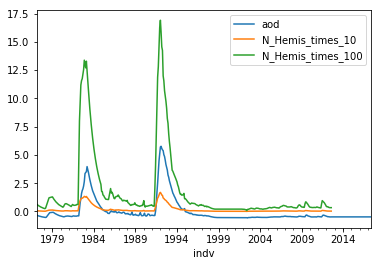

In [28]:
df['global_times_100'] = df['global']*10
df['N_Hemis_times_10'] = df['N_Hemis']*10
df['N_Hemis_times_100'] = df['N_Hemis']*100

df['S_Hemis_times_100'] = df['S_Hemis']*10

predictors.aod.plot(legend = 'aod')

#df['global_times_100'].loc['1977-02-01':].plot(legend = 'AOD')
df['N_Hemis_times_10'].loc['1977-02-01':].plot(legend = 'AOD')
df['N_Hemis_times_100'].loc['1977-02-01':].plot(legend = 'AOD')

plt.savefig('AOD.pdf')

In [47]:
predictors['aod'].loc['1990-01-01':'1995-01-01']

time
1990-01-01   -0.297617
1990-02-01   -0.151545
1990-03-01   -0.342760
1990-04-01   -0.397996
1990-05-01   -0.402767
1990-06-01   -0.337805
1990-07-01   -0.227150
1990-08-01   -0.230453
1990-09-01   -0.272110
1990-10-01   -0.371387
1990-11-01   -0.356890
1990-12-01   -0.342944
1991-01-01   -0.321473
1991-02-01   -0.345513
1991-03-01   -0.353037
1991-04-01   -0.361111
1991-05-01   -0.349183
1991-06-01    0.016548
1991-07-01    0.642126
1991-08-01    1.683899
1991-09-01    2.522529
1991-10-01    3.529252
1991-11-01    4.484777
1991-12-01    5.077507
1992-01-01    5.705837
1992-02-01    5.766578
1992-03-01    5.569307
1992-04-01    5.449660
1992-05-01    5.378826
1992-06-01    5.021537
                ...   
1992-08-01    4.535609
1992-09-01    4.156482
1992-10-01    3.901039
1992-11-01    3.662479
1992-12-01    3.225731
1993-01-01    3.032864
1993-02-01    2.721268
1993-03-01    2.495737
1993-04-01    2.259746
1993-05-01    2.043023
1993-06-01    1.835660
1993-07-01    1.627012
1993-0